# <font color=#B40431>Ensemble Methods<font>

## <font color=#424242>A Sexy Machine Learning Strategy<font>

### Dataset

We want to assess the credit risk of someone using its finantial history. 
Basically, we'll use 20 finantial attributes to classify people as good or bad credit risks. 

We have a set of samples labeled as low risk or high risk. So, this is a binary classification problem.

Attributes:
-  __A1:__ status of existing checking account (categorical)
-  __A2:__ credit duration in months (numerical)
-  __A3:__ credit history (categorical)
-  __A4:__ credit purpose (categorical)
-  __A5:__ credit amount (numerical)
-  __A6:__ savings account/bonds (categorical)
-  __A7:__ how long one is employed in the current job (categorical)
-  __A8:__ installment rate in percentage of disposable income (numerical)
-  __A9:__ personal status and sex (categorical)
-  __A10:__ other debtors/guarantors (categorical)
-  __A11:__ how long one lives in the current residence (numerical)
-  __A12:__ property (categorical)
-  __A13:__ age (numerical)
-  __A14:__ other installment plans (categorical)
-  __A15:__ housing (categorical)
-  __A16:__ number of existing credits at this bank (numerical)
-  __A17:__ job (categorical)
-  __A18:__ number of people being liable to provide maintenance for (numerical) 
-  __A19:__ telephone (categorical, bool)
-  __A20:__ foreign worker (categorical, bool)

The dataset is available online:
https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/

## Settings

In [1]:
# imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# seeding the generated number makes our results reproducible
from random import seed 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc

In [2]:
# directory and paths
project_dir = os.path.dirname(os.getcwd())
path_data = os.path.join(project_dir, 'data', 'german_data.txt')

settings = {'grid_search':False}
seed(1994)

## Load Data

In [3]:
# load dataset
column_name = ['A'+str(i) for i in range(1,21)] + ['TARGET']
df_data = pd.read_csv(path_data, sep=" ", header=None, names=column_name, dtype={'TARGET':str})

# replace class names
df_data.replace({'TARGET':{'1':'good', '2':'bad'}}, inplace=True)
df_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,TARGET
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,bad


# Exploratory Data Analysis

*Use the Scikit-learn flowchart to find one reliable estimator for the job
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [4]:
# 1 - check how many samples you have
print('Number of samples: {}'.format(df_data.shape[0]))

Number of samples: 1000


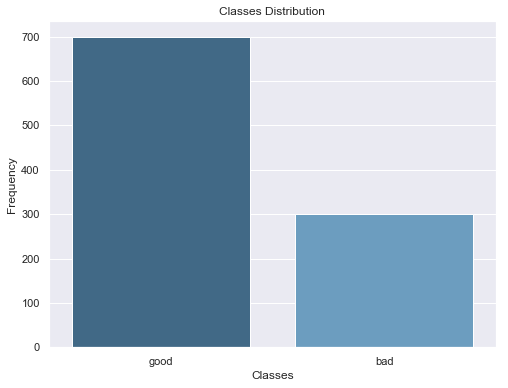

In [5]:
# 2 - check if classes are balanced or unbalanced
data = df_data.TARGET.value_counts()
#sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.set()
sns.barplot(x = data.index, y=data.values, palette="Blues_d", order=['good', 'bad'])
plt.title('Classes Distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

Comment: Classes are unbalanced.

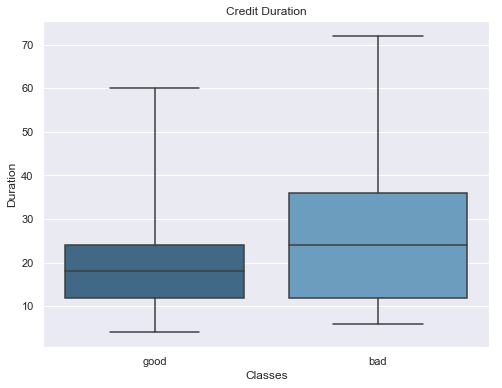

In [6]:
# 3 - check a numerical feature - credit duration in month
plt.figure(figsize=(8, 6))
sns.set()
sns.boxplot(x="TARGET", y="A2", data=df_data, palette="Blues_d", whis=10)
plt.title('Credit Duration')
plt.xlabel('Classes')
plt.ylabel('Duration')
plt.show()

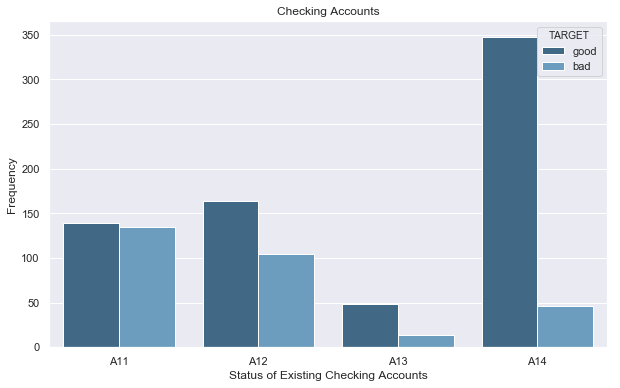

In [7]:
# 4 - check a category feature - status of existing checking accounts
data = pd.DataFrame(df_data.groupby('TARGET').apply(lambda x: x['A1'].value_counts()))
data.reset_index(inplace=True)
data.columns=['TARGET', 'A1', 'COUNT']

plt.figure(figsize=(10, 6))
sns.set()
sns.barplot(x='A1', y='COUNT', hue='TARGET', data=data, palette="Blues_d", hue_order=['good', 'bad'], 
            order=sorted(data.A1.unique()))
plt.title('Checking Accounts')
plt.xlabel('Status of Existing Checking Accounts')
plt.ylabel('Frequency')
plt.show()

-  __A11:__ 0 DM
-  __A12:__ < 200 DM
-  __A13:__ >= 200 DM
-  __A14:__ no checking account

*DM stands for Deutsche Mark

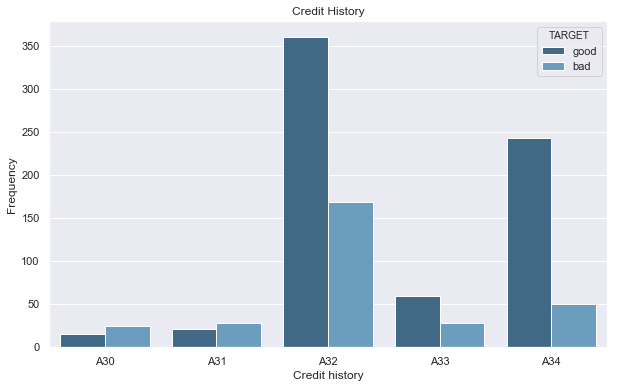

In [8]:
# 5 - check a category feature - credit history
data = pd.DataFrame(data=df_data.groupby('TARGET')['A3'].value_counts())
data.columns = ['COUNT']
data.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.set()
sns.barplot(x='A3', y='COUNT', hue='TARGET', data=data, palette="Blues_d", hue_order=['good', 'bad'], 
            order=sorted(data.A3.unique()))
plt.title('Credit History')
plt.xlabel('Credit history')
plt.ylabel('Frequency')
plt.show()

-  __A30:__ No credit taken/ all credits paid back duly
-  __A31:__ All credits at this bank paid back duly
-  __A32:__ Existing credits paid back duly till now
-  __A33:__ Delay in paying off in the past
-  __A34:__ Critical account/ other credits existing at different banks


### <font color=#B40431>__Exercise 1:__<font> 
-  Generate the bar chart for attribute __A17__, grouped by class. 
-  Draw conclusions from the graph.

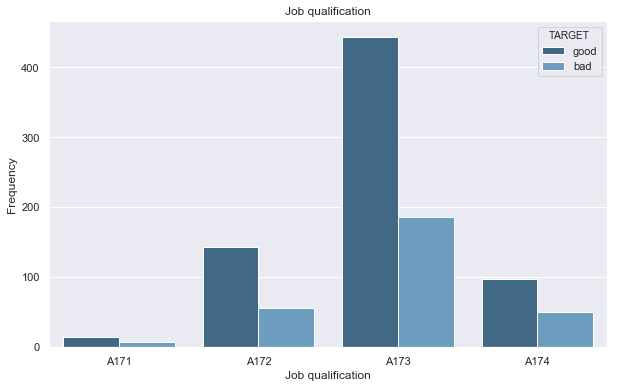

In [9]:
# check a category feature - job qualification
data = pd.DataFrame(data=df_data.groupby('TARGET')['A17'].value_counts())
data.columns = ['COUNT']
data.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.set()
sns.barplot(x='A17', y='COUNT', hue='TARGET', data=data, palette="Blues_d", hue_order=['good', 'bad'], 
            order=sorted(data.A17.unique()))
plt.title('Job qualification')
plt.xlabel('Job qualification')
plt.ylabel('Frequency')
plt.show()

-  __A171:__ unemployed or unskilled - non-residen
-  __A172:__ unskilled - resident
-  __A173:__ skilled employee or official
-  __A174:__ management, self-employed, highly qualified employee or officer

## Convert categorical features into dummies

In [10]:
# get predictors and classes
inputs = df_data.iloc[:,:-1]
targets = df_data['TARGET']

# Convert categorical variable into dummy/indicator variables
categ_cols = ['A1', 'A3', 'A4', 'A6', 'A7', 'A9', 'A10', 'A12', 'A14', 'A15', 'A17', 'A19', 'A20']
inputs = pd.get_dummies(inputs, columns=categ_cols, drop_first=True)
inputs.head()

,A2,A5,A8,A11,A13,A16,A18,A1_A12,A1_A13,A1_A14,...,A12_A124,A14_A142,A14_A143,A15_A152,A15_A153,A17_A172,A17_A173,A17_A174,A19_A192,A20_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


## Split data into training and test sets

In [11]:
# Split data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, stratify=targets, random_state=40)

# <font color=#B40431>Random Forest<font>

## Grid search

In [12]:
# Define parameters 
params_grid = {
    'n_estimators': [10, 100, 1000, 5000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'bootstrap': [True, False]
}

In [13]:
# Exhaustive search over specified parameter values for an estimator
if settings['grid_search']:
    clf_srch_rf = GridSearchCV(RandomForestClassifier(), params_grid, scoring='roc_auc', cv=3)
    clf_srch_rf.fit(X_train, y_train)

    # Get best parameters
    params = clf_srch_rf.best_params_
else:
    # If you want to avoid performing the grid search, uncomment the code below
    params = {
        'bootstrap': True, 
        'criterion': 'gini',
        'max_depth': None,
        'max_features': 'auto',
        'min_samples_leaf': 1,
        'min_samples_split': 2,
        'n_estimators': 1000}
params

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

## Model Fitting

In [14]:
# Build a forest of trees from the training set (X_train, y_train)
clf_rf = RandomForestClassifier(**params)
clf_rf.fit(X_train, y_train)

# Predict class for X_train and X_test
y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

## Performance Evaluation

\begin{equation}
TPR = Recall = \frac{TP}{P} = \frac{TP}{TP+FN}
\end{equation}

\begin{equation}
FPR = Fall-out = \frac{FP}{N} = \frac{FP}{FP+TN}
\end{equation}

\begin{equation}
PPV = Precision = \frac{TP}{TP+FP}
\end{equation}

\begin{equation}
f1 = 2\frac{PPV*TPR}{PPV+TPV}
\end{equation}

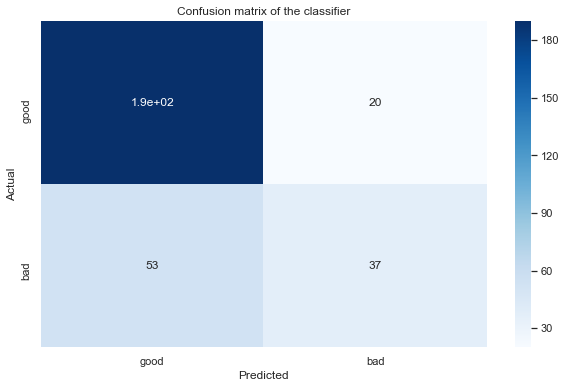

In [15]:
# Compute confusion matrix to evaluate the accuracy of a classification
conf_matrix = confusion_matrix(y_test, y_pred_test, labels=['good', 'bad'])

plt.figure(figsize=(10, 6))
sns.set()
sns.heatmap(conf_matrix, xticklabels=['good', 'bad'], yticklabels=['good', 'bad'], annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of the classifier')

plt.show()

*The label "bad" is considered as positive

In [16]:
print('True Negative (TN): {}'.format(conf_matrix[0,0]))
print('False Positive (FP): {}'.format(conf_matrix[0,1]))
print('False Negative (FN): {}'.format(conf_matrix[1,0]))
print('True Negative (TN): {}'.format(conf_matrix[1,1]))

True Negative (TN): 190
False Positive (FP): 20
False Negative (FN): 53
True Negative (TN): 37


In [17]:
# Get classification report
df_class_report = pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True))
print(df_class_report)

# Get accuracy score
acc = accuracy_score(y_test, y_pred_test)
print('\nAccuracy = {:.2%}'.format(acc))

                 bad        good   micro avg   macro avg  weighted avg
f1-score    0.503401    0.838852    0.756667    0.671127      0.738217
precision   0.649123    0.781893    0.756667    0.715508      0.742062
recall      0.411111    0.904762    0.756667    0.657937      0.756667
support    90.000000  210.000000  300.000000  300.000000    300.000000

Accuracy = 75.67%


In [18]:
def binarize(y, target='bad'):
    return [1 if y_i=='bad' else 0 for y_i in y]

/Users/nb23864/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


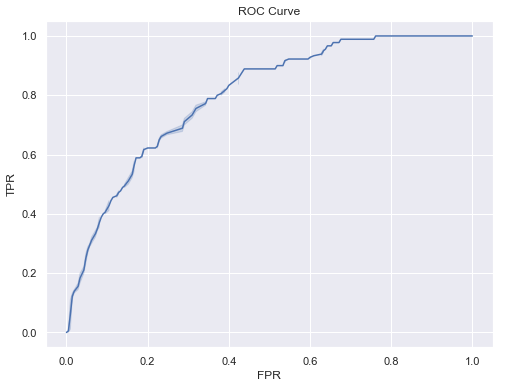

AUC: 0.8


In [19]:
# Plot the ROC curve 
y_pred_test_prob = clf_rf.predict_proba(X_test)
fpr, tpr, trs = roc_curve(binarize(y_test), y_pred_test_prob[:,0])

plt.figure(figsize=(8, 6))
sns.set()
sns.lineplot(fpr, tpr, palette="Blues_d")
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('AUC: {:.2}'.format(auc(fpr, tpr)))

### <font color=#B40431>__Exercise 2:__<font> 
-  Check for overfitting by computing the accuracy score both for training set and test set.
-  As you know, RF has some knobs to avoid overfitting. Apply some changes to such parameters and draw some conclusions.

In [20]:
# Check for overfitting
# if accuracy score for the training set is much higher than the accuracy for the test set, 
# the model is prone to overfitting
acc = accuracy_score(y_train, y_pred_train) # test set
print('Training Set Accuracy = {:.2%}'.format(acc))

acc = accuracy_score(y_test, y_pred_test) # test set
print('Test Set Accuracy = {:.2%}'.format(acc))

Training Set Accuracy = 100.00%
Test Set Accuracy = 75.67%


### <font color=#B40431>__Exercise 3:__<font> 
-  Check the feature importance. Find out which are the 5 attributes with higher importance.

In [21]:
# Return the feature importances
feature_importance = pd.DataFrame(data=clf_rf.feature_importances_, columns=['WEIGHT'], index=X_train.columns)
feature_importance['RAW_ATTRIBUTE'] = [x[:x.index('_')] if '_' in x else x for x in feature_importance.index]

feature_importance = feature_importance.groupby('RAW_ATTRIBUTE')['WEIGHT'].sum()
feature_importance.sort_values(ascending=False, inplace=True)
feature_importance[:5]

RAW_ATTRIBUTE
A5     0.121778
A1     0.101312
A2     0.092379
A13    0.089560
A4     0.073905
Name: WEIGHT, dtype: float64

# <font color=#B40431>Gradient Boosting Machine<font>

### <font color=#B40431>__Exercise 4:__<font> 
-  Fit a Gradient Boosting Machine to the German Credit Risk Assessment dataset.
-  Evaluate the model performance.
-  Check which model performs better in this case and try to understand why.
    
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

## Grid search

In [22]:
# Define parameters 
params_grid = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.1],
    'n_estimators': [10, 100, 1000, 5000],
    'criterion': ['friedman_mse'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'subsample': [0.5]
}

In [23]:
# Exhaustive search over specified parameter values for an estimator
if settings['grid_search']:
    clf_srch_gbm = GridSearchCV(GradientBoostingClassifier(), params_grid, scoring='roc_auc', cv=3)
    clf_srch_gbm.fit(X_train, y_train)

    # Get best parameters
    params = clf_srch_gbm.best_params_
else:
    # If you want to avoid performing the grid search, uncomment the code below
    params = {
        'criterion': 'friedman_mse',
        'learning_rate': 0.05,
        'max_depth': 30,
        'max_features': 'auto',
        'min_samples_leaf': 5,
        'min_samples_split': 10,
        'n_estimators': 350,
        'subsample': .6
        }
params

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 350,
 'subsample': 0.6}

## Model Fitting

In [24]:
# Build a forest of trees from the training set (X_train, y_train)
clf_gbm = GradientBoostingClassifier(**params)
clf_gbm.fit(X_train, y_train)

# Predict class for X_train and X_test
y_pred_train = clf_gbm.predict(X_train)
y_pred_test = clf_gbm.predict(X_test)

## Performance Evaluation

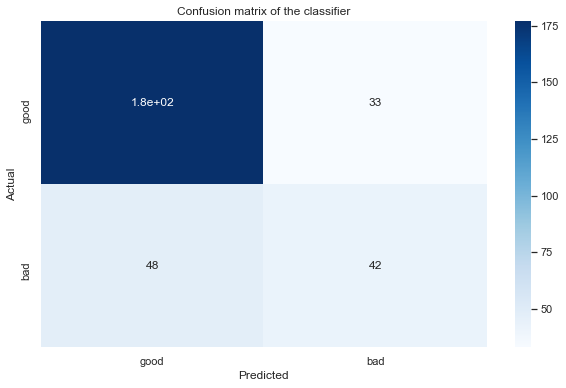

In [25]:
# Compute confusion matrix to evaluate the accuracy of a classification
conf_matrix = confusion_matrix(y_test, y_pred_test, labels=['good', 'bad'])

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, xticklabels=['good', 'bad'], yticklabels=['good', 'bad'], annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of the classifier')

plt.show()

In [26]:
print('True Negative (TN): {}'.format(conf_matrix[0,0]))
print('False Positive (FP): {}'.format(conf_matrix[0,1]))
print('False Negative (FN): {}'.format(conf_matrix[1,0]))
print('True Negative (TN): {}'.format(conf_matrix[1,1]))

True Negative (TN): 177
False Positive (FP): 33
False Negative (FN): 48
True Negative (TN): 42


In [27]:
# Get classification report
df_class_report = pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True))
print(df_class_report)

# Get accuracy score
acc = accuracy_score(y_test, y_pred_test)
print('\nAccuracy = {:.2%}'.format(acc))

                 bad        good  micro avg   macro avg  weighted avg
f1-score    0.509091    0.813793       0.73    0.661442      0.722382
precision   0.560000    0.786667       0.73    0.673333      0.718667
recall      0.466667    0.842857       0.73    0.654762      0.730000
support    90.000000  210.000000     300.00  300.000000    300.000000

Accuracy = 73.00%


/Users/nb23864/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


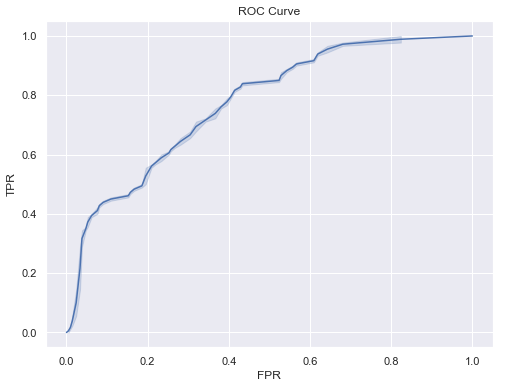

AUC: 0.77


In [28]:
# Plot the ROC curve 
y_pred_test_prob = clf_gbm.predict_proba(X_test)
fpr, tpr, trs = roc_curve(binarize(y_test), y_pred_test_prob[:,0])


plt.figure(figsize=(8, 6))
sns.set()
sns.lineplot(fpr, tpr, palette="Blues_d")
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('AUC: {:.2}'.format(auc(fpr, tpr)))

In [29]:
# Check for overfitting
# if accuracy score for the training set is much higher than the accuracy for the test set, 
# the model is prone to overfitting
acc = accuracy_score(y_train, y_pred_train) # test set
print('Training Set Accuracy = {:.2%}'.format(acc))

acc = accuracy_score(y_test, y_pred_test) # test set
print('Test Set Accuracy = {:.2%}'.format(acc))

Training Set Accuracy = 100.00%
Test Set Accuracy = 73.00%


In [30]:
# Return the feature importances
feature_importance = pd.DataFrame(data=clf_gbm.feature_importances_, columns=['WEIGHT'], index=X_train.columns)
feature_importance['RAW_ATTRIBUTE'] = [x[:x.index('_')] if '_' in x else x for x in feature_importance.index]

feature_importance = feature_importance.groupby('RAW_ATTRIBUTE')['WEIGHT'].sum()
feature_importance.sort_values(ascending=False, inplace=True)
feature_importance[:5]

RAW_ATTRIBUTE
A5     0.194219
A13    0.115010
A1     0.113380
A2     0.110424
A3     0.053211
Name: WEIGHT, dtype: float64